In [1]:
from src.benford.benford import (
    benford_table, 
    significant, 
    nth_significant_digit, 
    frequency_table,
    barplot,
    distribution_plot,
    chi_squared_statistic, 
    chi_squared_critical, 
    chi_squared_passed,
    kolmogorov_smirnov_critical,
    kolmogorov_smirnov_statistic,
    kolmogorov_smirnov_passed,
    delta,
    mad2_critical, mad2_passed, mad2_statistic,
    mad_critical, mad_passed, mad_statistic,
    suminvariance_test, sum_invariance_table
)
from math import log10, log
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

### Gleichverteilung, nicht benford

In [2]:
sample_uniform = random.default_rng().uniform(0,10,1000)

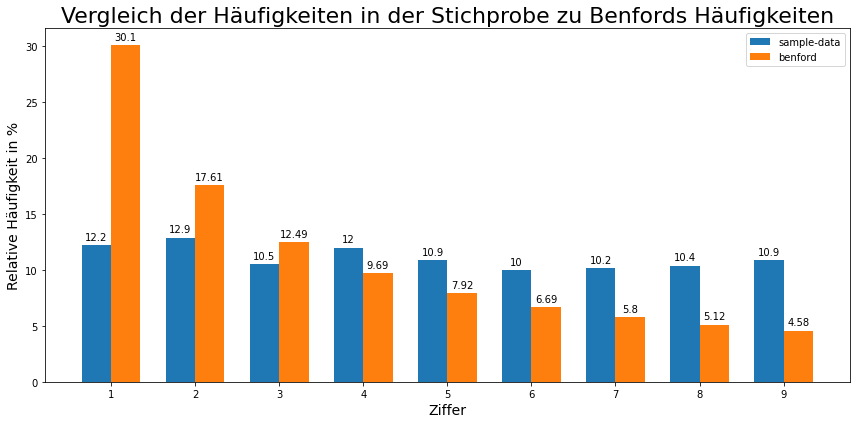

In [4]:
f = barplot(frequency_table(sample_uniform))

In [5]:
kolmogorov_smirnov_passed(sample_uniform)

False

In [6]:
chi_squared_passed(sample_uniform)

False

In [7]:
mad2_passed(sample_uniform)

False

In [8]:
mad_passed(sample_uniform)

False

In [10]:
suminvariance_test(sample_uniform)

False

In [16]:
sum_invariance_table(sample_uniform)

digit
1    0.033626
2    0.061023
3    0.068378
4    0.101367
5    0.111770
6    0.120862
7    0.142775
8    0.165480
9    0.194719
Name: significant, dtype: float64

In [20]:
delta(frequency_table(sample_uniform))

17.90299956639812

### 2^U(0,10) Benford

In [17]:
sample_2uni = 2**sample_uniform

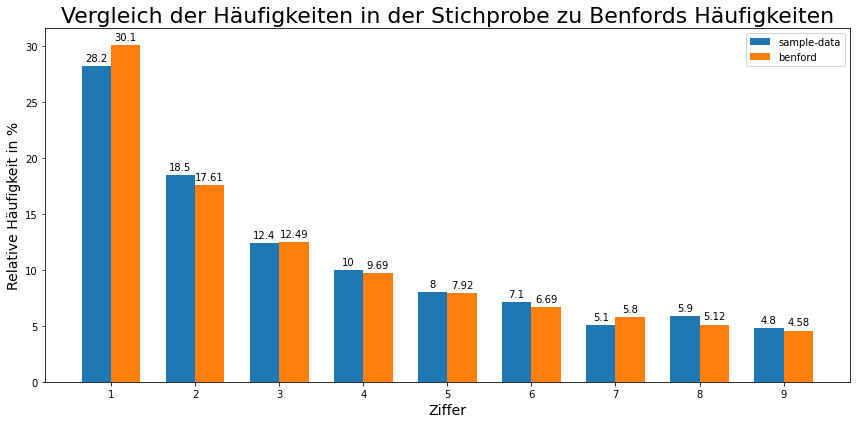

In [18]:
f = barplot(frequency_table(sample_2uni))

In [21]:
kolmogorov_smirnov_passed(sample_2uni)

True

In [22]:
chi_squared_passed(sample_2uni)

True

In [23]:
mad2_passed(sample_2uni)

True

In [24]:
mad_passed(sample_2uni)

True

In [25]:
suminvariance_test(sample_2uni)

True

In [26]:
sum_invariance_table(sample_2uni)

digit
1    0.101611
2    0.115038
3    0.107607
4    0.112120
5    0.110002
6    0.115959
7    0.096416
8    0.126334
9    0.114913
Name: significant, dtype: float64

In [27]:
delta(frequency_table(sample_2uni))

1.9029995663981225

## Vergleich der Hypothesentest

In [4]:
results = []

for i in range(1000):
    sample = 2**random.default_rng().uniform(0,10,1000)
    results.append(
        (
            chi_squared_passed(sample, alpha=0.01),
            kolmogorov_smirnov_passed(sample, alpha=0.01),
            mad_passed(sample, alpha=0.01),
            mad2_passed(sample, alpha=0.01),
            suminvariance_test(sample, alpha=0.01)
        )
    )

In [6]:
df = pd.DataFrame(results, columns=[
    'chi2', 'KS', 'MAD', 'MAD2','SI'
])

In [12]:
100 - df[df==True].count()/1000*100

chi2    1.3
KS      1.0
MAD     1.8
MAD2    1.0
SI      1.0
dtype: float64

In [19]:
results = []

for i in range(1000):
    sample = random.default_rng().exponential(1,1000)
    results.append(
        (
            chi_squared_passed(sample, alpha=0.01),
            kolmogorov_smirnov_passed(sample, alpha=0.01),
            mad_passed(sample, alpha=0.01),
            mad2_passed(sample, alpha=0.01),
            suminvariance_test(sample, alpha=0.01)
        )
    )

In [20]:
df = pd.DataFrame(results, columns=[
    'chi2', 'KS', 'MAD', 'MAD2','SI'
])

In [21]:
100 - df[df==True].count()/1000*100

chi2    15.6
KS      21.6
MAD     28.2
MAD2    21.1
SI       1.6
dtype: float64

In [30]:
results = []

for i in range(1000):
    sample = random.default_rng().standard_cauchy(1000)
    results.append(
        (
            chi_squared_passed(sample, alpha=0.01),
            kolmogorov_smirnov_passed(sample, alpha=0.01),
            mad_passed(sample, alpha=0.01),
            mad2_passed(sample, alpha=0.01),
            suminvariance_test(sample, alpha=0.01)
        )
    )

In [31]:
df = pd.DataFrame(results, columns=[
    'chi2', 'KS', 'MAD', 'MAD2','SI'
])

In [32]:
100 - df[df==True].count()/1000*100

chi2    3.4
KS      3.3
MAD     3.9
MAD2    3.1
SI      0.8
dtype: float64

In [33]:
results = []

for i in range(1000):
    sample = random.default_rng().uniform(0,10,1000)
    results.append(
        (
            chi_squared_passed(sample, alpha=0.01),
            kolmogorov_smirnov_passed(sample, alpha=0.01),
            mad_passed(sample, alpha=0.01),
            mad2_passed(sample, alpha=0.01),
            suminvariance_test(sample, alpha=0.01)
        )
    )

In [34]:
df = pd.DataFrame(results, columns=[
    'chi2', 'KS', 'MAD', 'MAD2','SI'
])

In [35]:
100 - df[df==True].count()/1000*100

chi2    100.0
KS      100.0
MAD     100.0
MAD2    100.0
SI      100.0
dtype: float64